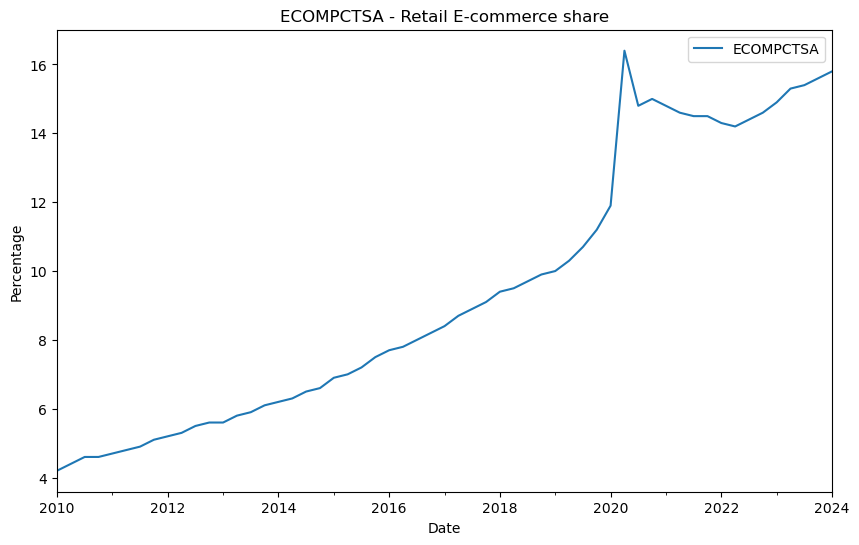

R^2: -1.3621019309323987
MSE: 0.6435087413227644
         Date  Predicted ECOMPCTSA
0  2024-01-31            15.429985
1  2024-03-01            15.501744
2  2024-03-31            15.573503
3  2024-04-30            15.645262
4  2024-05-30            15.717021
5  2024-06-29            15.788780
6  2024-07-29            15.860539
7  2024-08-28            15.932298
8  2024-09-27            16.004057
9  2024-10-27            16.075816
10 2024-11-26            16.147575
11 2024-12-26            16.219334


In [6]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from datetime import timedelta

start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

data = web.DataReader('ECOMPCTSA', 'fred', start_date, end_date)

data.head()

# Проверка на пропуски
data.isnull().sum()

# Проверка типа данных
data.dtypes

# Статистическое описание данных
data.describe()


data.plot(figsize=(10, 6))
plt.title("ECOMPCTSA - Retail E-commerce share")
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.show()

# Заполнение пропусков линейной интерполяцией
data = data.interpolate(method='linear')

# Преобразование данных в формат, пригодный для анализа
data = data.dropna()  # удаление оставшихся пропусков

# Разделение данных на обучающую и тестовую выборки
X = data.index.values.reshape(-1, 1)  # Индексы времени как признака
y = data['ECOMPCTSA'].values  # Целевая переменная

# Преобразование индексов времени в числовое представление
X = np.array([x.toordinal() for x in data.index]).reshape(-1, 1)

# Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Прогнозирование на 12 месяцев вперед
last_date = data.index[-1]
forecast_dates = [last_date + timedelta(days=i*30) for i in range(1, 13)]  # Примерное увеличение на 30 дней

# Преобразуем прогнозируемые даты в числовой формат
X_forecast = np.array([date.toordinal() for date in forecast_dates]).reshape(-1, 1)

# Прогнозирование
y_forecast = model.predict(X_forecast)

# Отображение результатов
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted ECOMPCTSA': y_forecast})
print(forecast_df)